In [ ]:
!pip install ultralytics

<img src = "https://blog.roboflow.com/content/images/size/w1000/2023/01/image-16.png">

## Yolo V8

<h3>Basic Structure of YOLO </h3>

- Image will divided in cells
- each cell will look for object
- After creating grifs, it will look for two things: Bounding box + confidence (the probability of an object being present under the box) and class probability map (what type of object it is, basically recognize)
- together they will be used for detection



<h3>Significance of Yolo V8 </h3>

-  _Anchor Free Detection_ : Yolo v8 doesnt predict or detect based on the bounding box anchors, unlike other models that needs to predict the coordinates first.This made the previous models difficult to detect tiny or very thing objects
- _New convolution_ : Changed the c2f module

<img src = "https://blog.roboflow.com/content/images/2023/01/Frame-21.png">

- _bottleneck block_ : YOLOv8 is starting to revert to the ResNet block defined in 2015 by using bottleneck kernel size with 3x3
- _augmentation_ : Mosaic Augmentation; YOLOv8 augments images during training online. At each epoch, the model sees a slightly different variation of the images it has been provided.

Non max suppresion: 

Eliminates the redundant bounding boxes when there are multiple boxes around the same object. suppresion will select the bpx with higher confidence score.

In [9]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

### Load the detection and instance model

In [10]:
#Detection model
det_model = YOLO('yolov8n.pt')
#load the model for instance segmentation model
inst_model = YOLO('yolov8n-seg.pt')

### run with the data

In [11]:
img = "/kaggle/input/no-datat/china-s-urban-scenery-pedestrians-taxi-31001908.jpeg"
#model will automatically convert the image to numpy array. no need to convert the image to numpy initially or manually
detection_result = det_model.predict(img) #the output will be arraya
instance_result = inst_model.predict(img)


image 1/1 /kaggle/input/no-datat/china-s-urban-scenery-pedestrians-taxi-31001908.jpeg: 448x640 4 persons, 1 bicycle, 2 cars, 1 truck, 78.2ms
Speed: 2.4ms preprocess, 78.2ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/no-datat/china-s-urban-scenery-pedestrians-taxi-31001908.jpeg: 448x640 3 persons, 1 bicycle, 1 car, 91.3ms
Speed: 1.6ms preprocess, 91.3ms inference, 5.9ms postprocess per image at shape (1, 3, 448, 640)


the advantage of instance model over detection model will be the additional area measurement with istance segmentation model.the results will be quantitive not just limited to detection.
But segmentation will be a redundant when we only need to know about the coordinates, nothing more. for example, self driving car, person detection.

### Plot the result

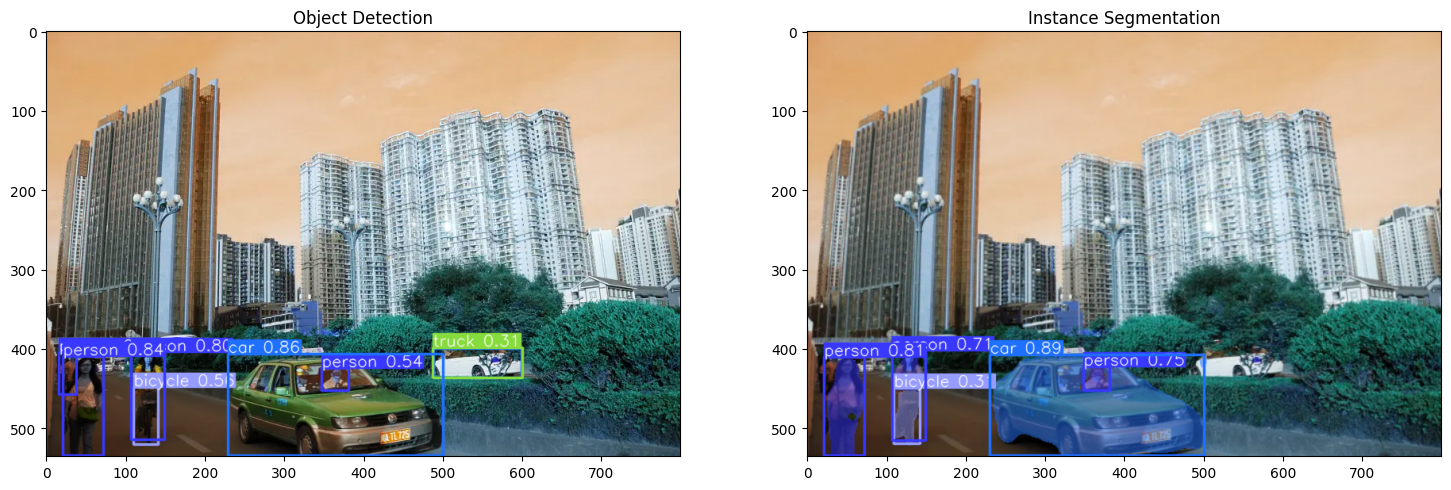

In [17]:
detection_result_array = detection_result[0].plot()
instance_result_array = instance_result[0].plot()
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Object Detection")
ax1.imshow(detection_result_array)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Instance Segmentation")
ax2.imshow(instance_result_array)

In [18]:
#Number of bounding boxes (objects) detected in the image
result = instance_result[0]
len(result.boxes)

5

### Prediction box analaysis

In [19]:
#BBOX coordinates, class ID, and probability for a specific box.
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print(result.names)

Object type: 2.0
Coordinates: [230.2423095703125, 408.56781005859375, 500.0882568359375, 535.1617431640625]
Probability: 0.8934099078178406
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 5

# References

- https://arxiv.org/pdf/1506.02640.pdf
- https://docs.ultralytics.com/modes/predict/
- https://github.com/ultralytics/ultralytics
- https://blog.roboflow.com/whats-new-in-yolov8/